# Import the libraries and load the image

In [ ]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import cv2 as cv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img = Image.open('/content/drive/MyDrive/Sample.jpeg')

NameError: ignored

In [ ]:
img

# Question 1.a

In [ ]:
# Convert it to array
numpydata = np.asarray(img)
print(numpydata.shape[0])

2485


In [ ]:
# Counting the number of pixels value
h = [0]*256
for x in range(numpydata.shape[0]):
    for y in range(numpydata.shape[1]):
        i = numpydata[x,y]
        h[i[0]] += 1

In [ ]:
# Iterates bins for plot
bins=[]
for i in range(0, 256):
  bins.append(i)

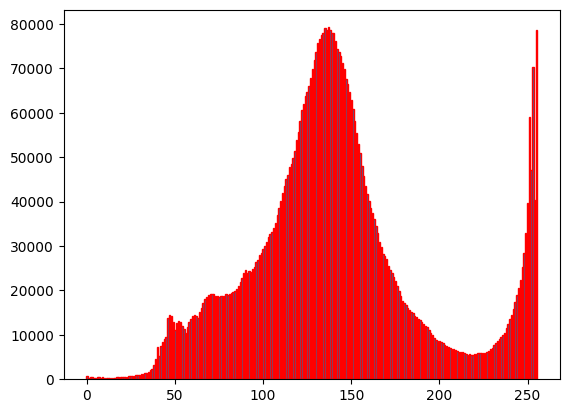

In [ ]:
# Ploting histogram
plt.bar(bins, h, edgecolor='r')
plt.show()

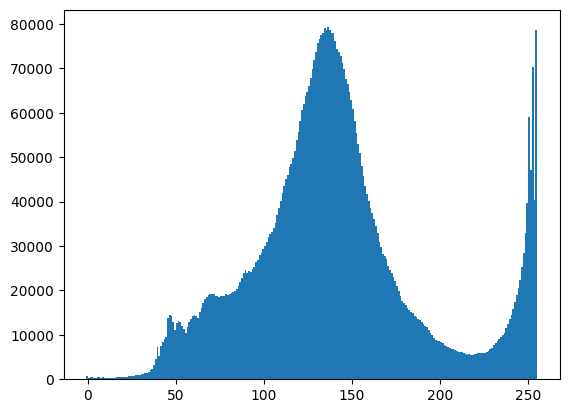

In [ ]:
# Now use the library to compare the two plots

im = cv2.imread('/content/drive/MyDrive/Sample.jpeg')
vals = im.mean(axis=2).flatten()
# calculate histogram
counts, bins = np.histogram(vals, range(257))
# plot histogram centered on values 0..255
plt.bar(bins[:-1] - 0.5, counts, width=1, edgecolor='none')
plt.show()


# Question 1.b

In [ ]:
# Convertong to grayscale
gray_scale = img.convert("L")
numpydata = np.asarray(gray_scale)
numpydata

array([[245, 254, 231, ..., 250, 236, 235],
       [243, 242, 250, ..., 243, 249, 251],
       [234, 255, 249, ..., 250, 247, 249],
       ...,
       [128, 102,  70, ..., 133, 135, 133],
       [129, 128, 111, ..., 124, 127, 146],
       [119, 129, 131, ..., 113, 119, 157]], dtype=uint8)

In [ ]:
# Use this function for increace or decrease the lighness of image
def change_color(arr, n, flag):
  data = arr
  for i in range(len(data)):
   for j in range(len(data[i])):
    if flag == 'increase':
     data[i][j] = data[i][j] + n
    if flag == 'decrease':
     data[i][j] += n
    if  data[i][j] < 0:
        data[i][j] = 0
    elif data[i][j] > 255:
        data[i][j] = 255
  return data

In [ ]:
data = [[0]*2485] * 2485
arr = np.array(data)

for i in range(len(arr)):
  for j in range(len(arr[i])):
    arr[i][j] = numpydata[i][j]

In [ ]:
new_img = change_color(arr, 100, "increase")
new_img

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [228, 202, 170, ..., 233, 235, 233],
       [229, 228, 211, ..., 224, 227, 246],
       [219, 229, 231, ..., 213, 219, 255]])

In [ ]:
plt.imshow(new_img, cmap='gray')
plt.plot()

NameError: ignored

# Question 3

In [ ]:
# Convert image to gray scale
gray_scale = img.convert("L")
numpydata = np.asarray(gray_scale)
numpydata

array([[245, 254, 231, ..., 250, 236, 235],
       [243, 242, 250, ..., 243, 249, 251],
       [234, 255, 249, ..., 250, 247, 249],
       ...,
       [128, 102,  70, ..., 133, 135, 133],
       [129, 128, 111, ..., 124, 127, 146],
       [119, 129, 131, ..., 113, 119, 157]], dtype=uint8)

In [ ]:
r_s =[0] * 256
for i in range(len(numpydata)):
  for j in range(len(numpydata[i])):
    r_s[numpydata[i][j]] += 1

In [ ]:
for i in range(len(r_s)):
  if i != 0:
    r_s[i] += r_s[i-1]

In [ ]:
for i in range(len(r_s)):
   r_s[i] = r_s[i] / r_s[len(r_s)-1]
   r_s[i] *= 255

In [ ]:
data = [[0]*2485] * 2485
arr = np.array(data)

for i in range(len(arr)):
  for j in range(len(arr[i])):
    arr[i][j] = numpydata[i][j]

In [ ]:
for i in range(len(numpydata)):
  for j in range(len(numpydata[i])):
    arr[i][j] = r_s[numpydata[i][j]]

[]

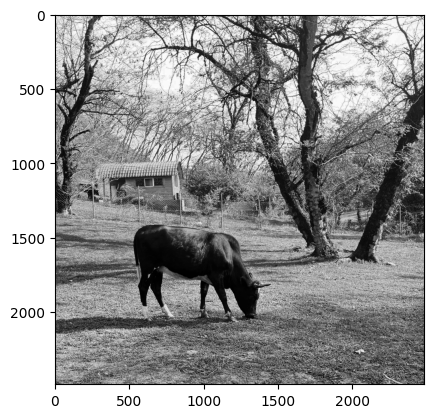

In [ ]:
plt.imshow(arr, cmap='gray')
plt.plot()

In [ ]:
im1 = Image.open('/content/drive/MyDrive/Sample.jpeg')

im2 = ImageOps.equalize(im1)

im2.show()

# Question 2

In [ ]:
# Reading the txt file
data = np.genfromtxt('/content/drive/MyDrive/ML/input2.txt', skip_header=1, dtype=str)
image = data[:, 1::3]
image = np.char.strip(image, ',')
image = image.astype(np.uint8)

cv2_imshow(image)

NameError: name 'np' is not defined

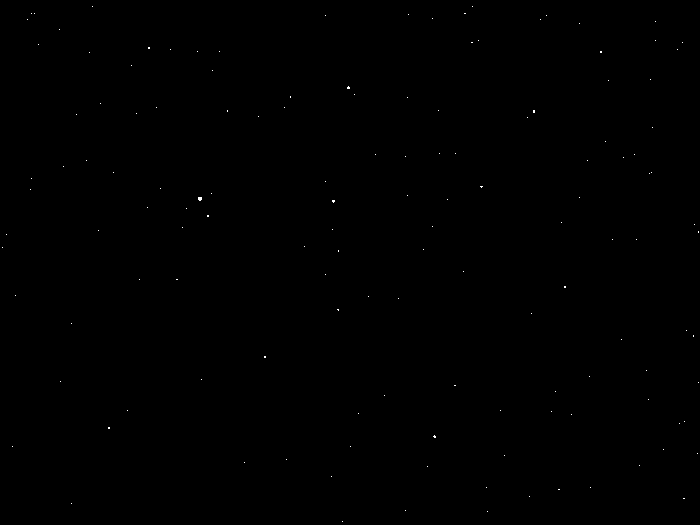

In [ ]:
# Consider a random treshhold(between 150 to 200) and check the pixels, if the pixel is bigger
# than treshhold we set 0 otherwise 255. After that we save the new file.
treshhold = 160
for i in range(len(image)):
  for j in range(len(image[i])):
     if image[i][j] < treshhold:
       image[i][j] = 0
     else:
       image[i][j] = 255
cv2_imshow(image)
output_image = Image.fromarray(image)
output_image.save('/content/drive/MyDrive/ML/image2.jpg')

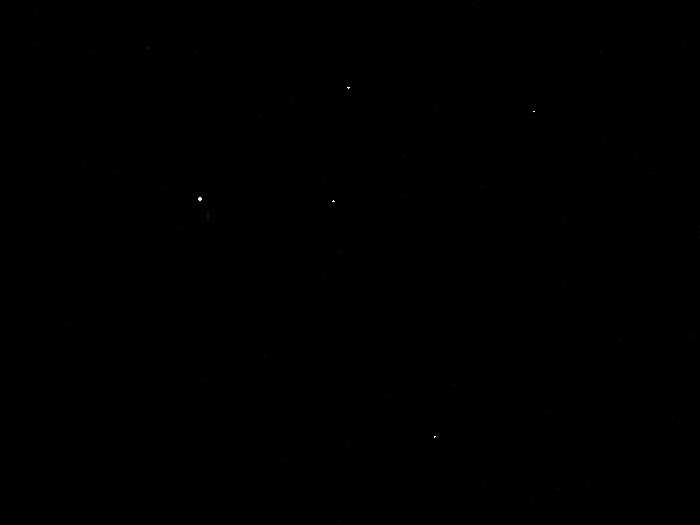

In [ ]:
# Read the image file and convert it to gray. After that apply the meduan filter on it ro remove noises.
image = cv2.imread('/content/drive/MyDrive/ML/image2.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
filtered_image = cv2.medianBlur(gray, 3)

cv2_imshow(filtered_image)

Number of the white spots: 5


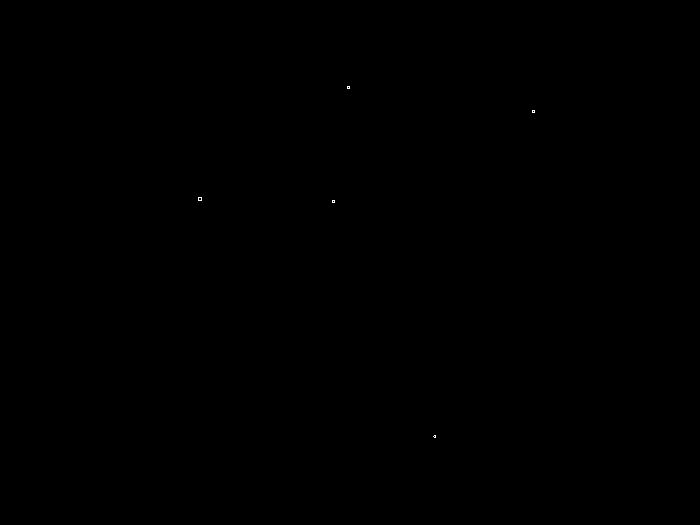

In [ ]:
# We use cv2 library to decribe the edges that we want and find contours on it to know how many stars in it.
edged = cv2.Canny(filtered_image, 30, 200)
contours, hierarchy = cv2.findContours(edged,
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

print(f'Number of the white spots: {len(contours)}')
cv2_imshow(edged)


In [ ]:
print(contours[0])


[[[202 258]]

 [[201 259]]

 [[201 260]]

 [[202 260]]

 [[203 260]]

 [[203 259]]

 [[203 258]]]


In [ ]:
# Find the center of each star
for i in range(len(contours)):
  if len(contours[i]) % 2 == 0:
    print(f'The center of star {i} is {contours[i][int(len(contours[i]) / 2)][0][0]} and {contours[i][int(len(contours[i]) / 2)][0][1]}')
  else:
    print(f'The center of star {i} is {contours[i][int((len(contours[i])+1)/2)][0][0]} and {contours[i][int((len(contours[i])+1)/2)][0][1]}')

The center of star 0 is 203 and 260
The center of star 1 is 119 and 260
The center of star 2 is 95 and 261
The center of star 3 is 153 and 250
The center of star 4 is 157 and 249
The center of star 5 is 85 and 256
The center of star 6 is 46 and 247
The center of star 7 is 190 and 241
The center of star 8 is 94 and 240
The center of star 9 is 83 and 239
The center of star 10 is 26 and 234
The center of star 11 is 117 and 227
The center of star 12 is 23 and 221
The center of star 13 is 48 and 216
The center of star 14 is 58 and 215
The center of star 15 is 19 and 206
The center of star 16 is 316 and 203
The center of star 17 is 259 and 190
The center of star 18 is 275 and 188
The center of star 19 is 240 and 175
The center of star 20 is 141 and 172
The center of star 21 is 77 and 169
The center of star 22 is 106 and 168
The center of star 23 is 305 and 148
The center of star 24 is 292 and 145
The center of star 25 is 30 and 144
The center of star 26 is 250 and 138
The center of star 27 i